# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
# Your code here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
import statistics as stats

age = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
tardies = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]

student_data = pd.DataFrame({'X': age, 'Y': tardies})
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

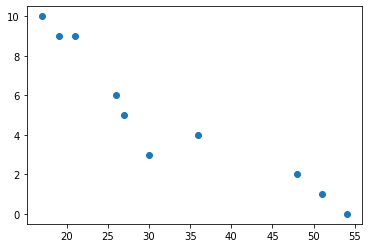

In [4]:
# Your code here.

plt.scatter(age, tardies)
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [70]:
# Your response here. 
"""""
In this case, the trend (which is negative) gives us the following insight: the younger the people, the later they arrive
This could be explained by factors such as maturity, sense of responsibility, impossibility to drive (faster transportation), and so on
"""""

'""\nIn this case, the trend (which is negative) gives us the following insight: the younger the people, the later they arrive\nThis could be explained by factors such as maturity, sense of responsibility, impossibility to drive (faster transportation), and so on\n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
#correlation:
student_data.corr()

#covariance:
student_data.cov()

print(student_data.corr())
print(student_data.cov())

          X         Y
X  1.000000 -0.939163
Y -0.939163  1.000000
            X          Y
X  187.655556 -45.566667
Y  -45.566667  12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
# Your response here.
result = sp.linregress(student_data)

print(result.slope)
print(result.intercept)

-0.2428207709159808
12.888803363135768


Plot your regression model on your scatter plot.

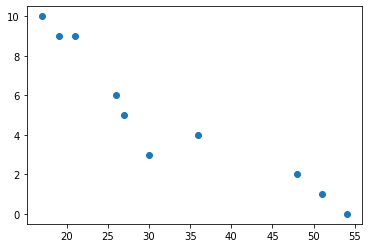

In [7]:
# Your code here.

from sklearn import linear_model

x = student_data[['X']]
y = student_data['Y']

plt.scatter(x,y)
plt.show()

In [12]:
model = linear_model.LinearRegression()

result = model.fit(x,y)
display(result.intercept_)
display(result.coef_)

12.888803363135768

array([-0.24282077])

InvalidIndexError: (slice(None, None, None), None)

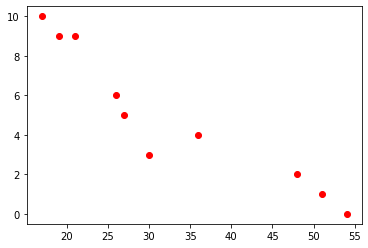

In [13]:
regression = linear_model.LinearRegression()
model = regression.fit(x, y)

plt.scatter(x, y, color = 'r')
plt.plot(x, x*regression.coef_ + regression.intercept_, lw = 2)
plt.xlabel('age')
plt.ylabel('tardies')
plt.legend()

# I am having same problem as in class. What is wrong?

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [34]:
# Your response here. 
"""""
It could be concluded that there is a strong negative correlation between these two variables: The younger the person (lower age), the later (higher amount of tardies) it tends to arrive
"""""

'""\nIt could be concluded that there is a strong negative correlation between these two variables: The younger the person (lower age), the later (higher amount of tardies) it tends to arrive\n'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [43]:
# Import any libraries you may need & the data (libs have already been imported)

vehicles = pd.read_csv("vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [45]:
# Your response here. 

# Dependent variables - Year, cylinders, fuel barrels/year, combined mgp, fuel cost/year
# Independent variable - CO2 Emission Grams/Mile

In [47]:
# create correlation matrix - very useful in data science and EDA

features = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
features

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100,244.000000
35948,2014,3.0,9.155833,36,1100,243.000000
35949,2015,3.0,9.155833,36,1100,244.000000
35950,2016,3.0,9.155833,36,1100,246.000000


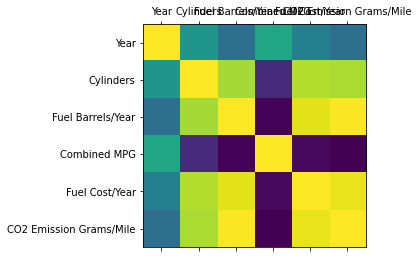

In [53]:
# Once the values are selected, identify correlation between them

features.corr()
plt.matshow(features.corr())
plt.xticks(range(0,6),features.columns)
plt.yticks(range(0,6),features.columns)
plt.show()

# Difficult to read the labels at the top...

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [57]:
# Your response here. 
# Independent variable
y = vehicles['CO2 Emission Grams/Mile']

# Dependent variable
x = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]

regression = linear_model.LinearRegression()
model = regression.fit(x, y)
print('r-squared', regression.score(x,y))

r-squared 0.9808734920269122


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [59]:
# Your response here. 
print(model.intercept_, model.coef_, model.score(x, y))

769.8882836465739 [-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948] 0.9808734920269122


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [60]:
# Your code here.

x = [1, 3, 4, 6, 8, 9, 11, 14]
y = [1, 2, 4, 4, 5, 7, 8, 13]

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

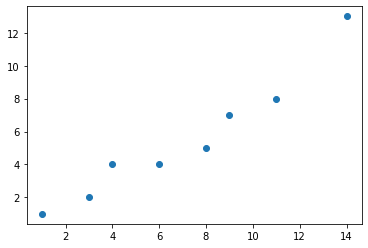

In [61]:
# Your code here.

plt.scatter(x,y)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [62]:
# Your response here. 
"""""
These values seem to be positively correlated
"""""

'""\nThese values seem to be positively correlated\n'

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [64]:
# Your response here. 
"""""
Yes, perhaps, the last point. Lets do it manually (is there any other way to do it? I can´t find it)
"""""

'""\nYes, perhaps, the last point. Lets do it manually (is there any other way to do it? I can´t find it)\n'

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


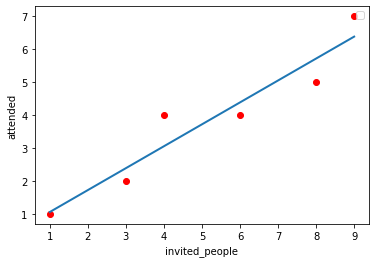

In [66]:
# Your response here. 
# First, we take out the last values which are, under my opinion, the outliers ones
x = np.array(x[:-1]).reshape(-1,1)
y = y[:-1]
regression = linear_model.LinearRegression()
model = regression.fit(x, y)

plt.scatter(x, y, color = 'r')
plt.plot(x, x*regression.coef_ + regression.intercept_, lw = 2)
plt.xlabel('invited_people')
plt.ylabel('attended')
plt.legend()